In [12]:
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torch.autograd import Variable
import torch.nn.functional as F
import torch
from PIL import Image
import matplotlib.pyplot as plt
import json

In [13]:
# load pre-trained model
model = models.alexnet(pretrained=True)

# YOUR CODE HERE

class_names = json.load(
    open("vs3ex1data/imagenet_class_index.json"))   # read class names
class_names = [class_names[str(x)][1] for x in range(0, 1000)]

# print(model)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )  # pixel value normalization

scale = transforms.Resize([224, 224])  # image re-size (to square)
tote = transforms.ToTensor()   # transfor to tensor
# put all transformations together
comptran = transforms.Compose([scale, tote, normalize])


transform = transforms.Compose([            #[1]
	 transforms.Resize(256),                    #[2]
	 transforms.CenterCrop(224),                #[3]
	 transforms.ToTensor(),                     #[4]
	 transforms.Normalize(                      #[5]
        mean=[0.485, 0.456, 0.406],                #[6]
        std=[0.229, 0.224, 0.225]                  #[7]
	 )])

In [22]:
# getting the class labels:
labels = {}
with open("vs3ex1data/imagenet_class_index.json") as f:
    labels = json.load(f)
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama


Image 1


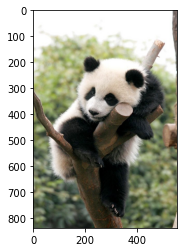

it is giant_panda with probability 99.89505767822266%

Image 2


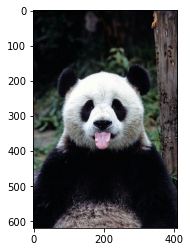

it is giant_panda with probability 99.99980926513672%

Image 3


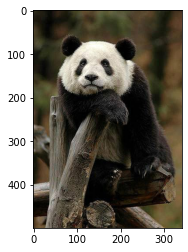

it is giant_panda with probability 99.95087432861328%

Image 4


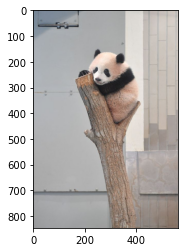

it is squirrel_monkey with probability 25.796144485473633%

Image 5


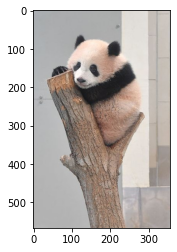

it is giant_panda with probability 68.5841293334961%

Image 6


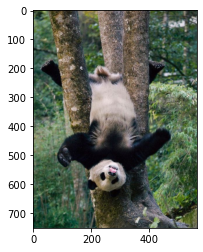

it is giant_panda with probability 87.5528793334961%

Image 7


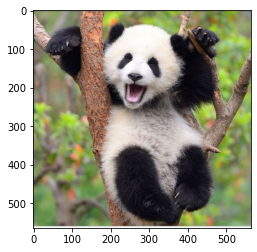

it is giant_panda with probability 93.18820190429688%

Image 8


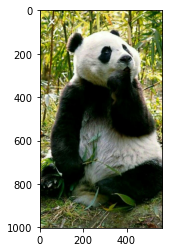

it is giant_panda with probability 56.62218475341797%

Image 9


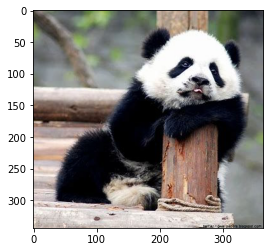

it is giant_panda with probability 97.8306884765625%

Image 10


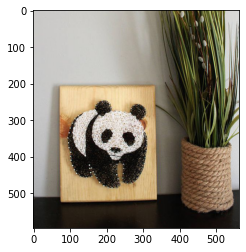

it is teddy with probability 37.426246643066406%

Image 11


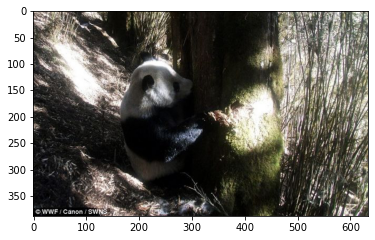

it is gorilla with probability 24.470338821411133%

Image 12


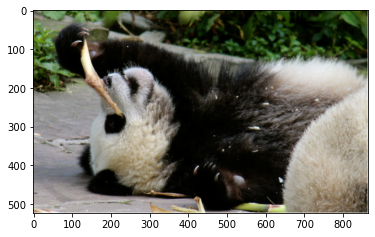

it is giant_panda with probability 73.55457305908203%

Image 13


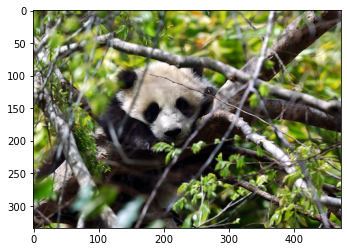

it is Madagascar_cat with probability 37.87068557739258%

Image 14


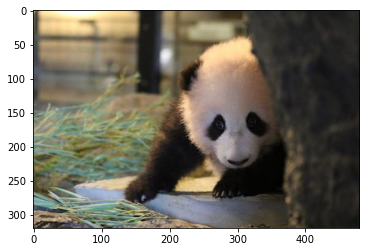

it is giant_panda with probability 99.95156860351562%


In [38]:
model.eval()   # put network in evaluation mode
for i in range(1,14+1):
    print('\nImage '+str(i))
    img = Image.open('vs3ex1data/panda/panda'+str(i)+'.jpg')
    plt.imshow(img)
    plt.show()
    plt.pause(0.1)
    # transorm image and feed to the network 
    
    img_t = transform(img)
    batch_t = torch.unsqueeze(img_t, 0)
    # print the predicted class and corresponding probability
    
    model.eval()
    out = model(batch_t)
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    normal_percentage = percentage[index].item()
    label = labels[str(index.item())]
    print(f"it is {label[1]} with probability {normal_percentage}%")
    